In [249]:
import src.util as util
import matplotlib.pyplot as plt

from src.p01_lr import logistic_regression, log_loss_signed
import src.p05_percept as p05_percept
import src.p06_spam as p06_spam
import src.svm as svm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import src.util as util

import seaborn as sns

from sklearn.metrics import accuracy_score

from pythetatools.config_visualisation import t2k_style
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use(t2k_style)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Problem 1

In [250]:
def plot(X, Y):
    mask_0 = Y==-1
    mask_1 = Y==1
    
    plt.scatter(X[mask_0, 1], X[mask_0, 2], color='blue', label='Class -1')
    plt.scatter(X[mask_1, 1], X[mask_1, 2], color='orange', label='Class +1', marker='s')

In [255]:
print('==== Training model on data set A ====')
Xa, Ya = util.load_csv('data/ds1_a.csv', add_intercept=True)
logistic_regression(Xa, Ya)
Xb, Yb = util.load_csv('data/ds1_b.csv', add_intercept=True)
logistic_regression(Xb, Yb)

==== Training model on data set A ====
7.226491864936692e-07
Finished 10000 iterations
5.3329785269148335e-11
Finished 20000 iterations
Converged in 29054 iterations
0.003361039469518825
Finished 10000 iterations
0.002173205351041188
Finished 20000 iterations
0.0016644896054955345
Finished 30000 iterations
0.00137040952812708
Finished 40000 iterations
0.0011758957242939641
Finished 50000 iterations
0.0010366393703263115
Finished 60000 iterations
0.0009315199306059814
Finished 70000 iterations
0.0008490730225995943
Finished 80000 iterations
0.0007824983080599451
Finished 90000 iterations
0.0007274911705015017
Finished 100000 iterations
0.0006811873212607069
Finished 110000 iterations
0.0006416037144878202
Finished 120000 iterations
0.00060732223371039
Finished 130000 iterations
0.0005773010263759997
Finished 140000 iterations
0.0005507569791240006
Finished 150000 iterations
0.0005270897930619665
Finished 160000 iterations
0.0005058313883535566
Finished 170000 iterations
0.00048661127387

KeyboardInterrupt: 

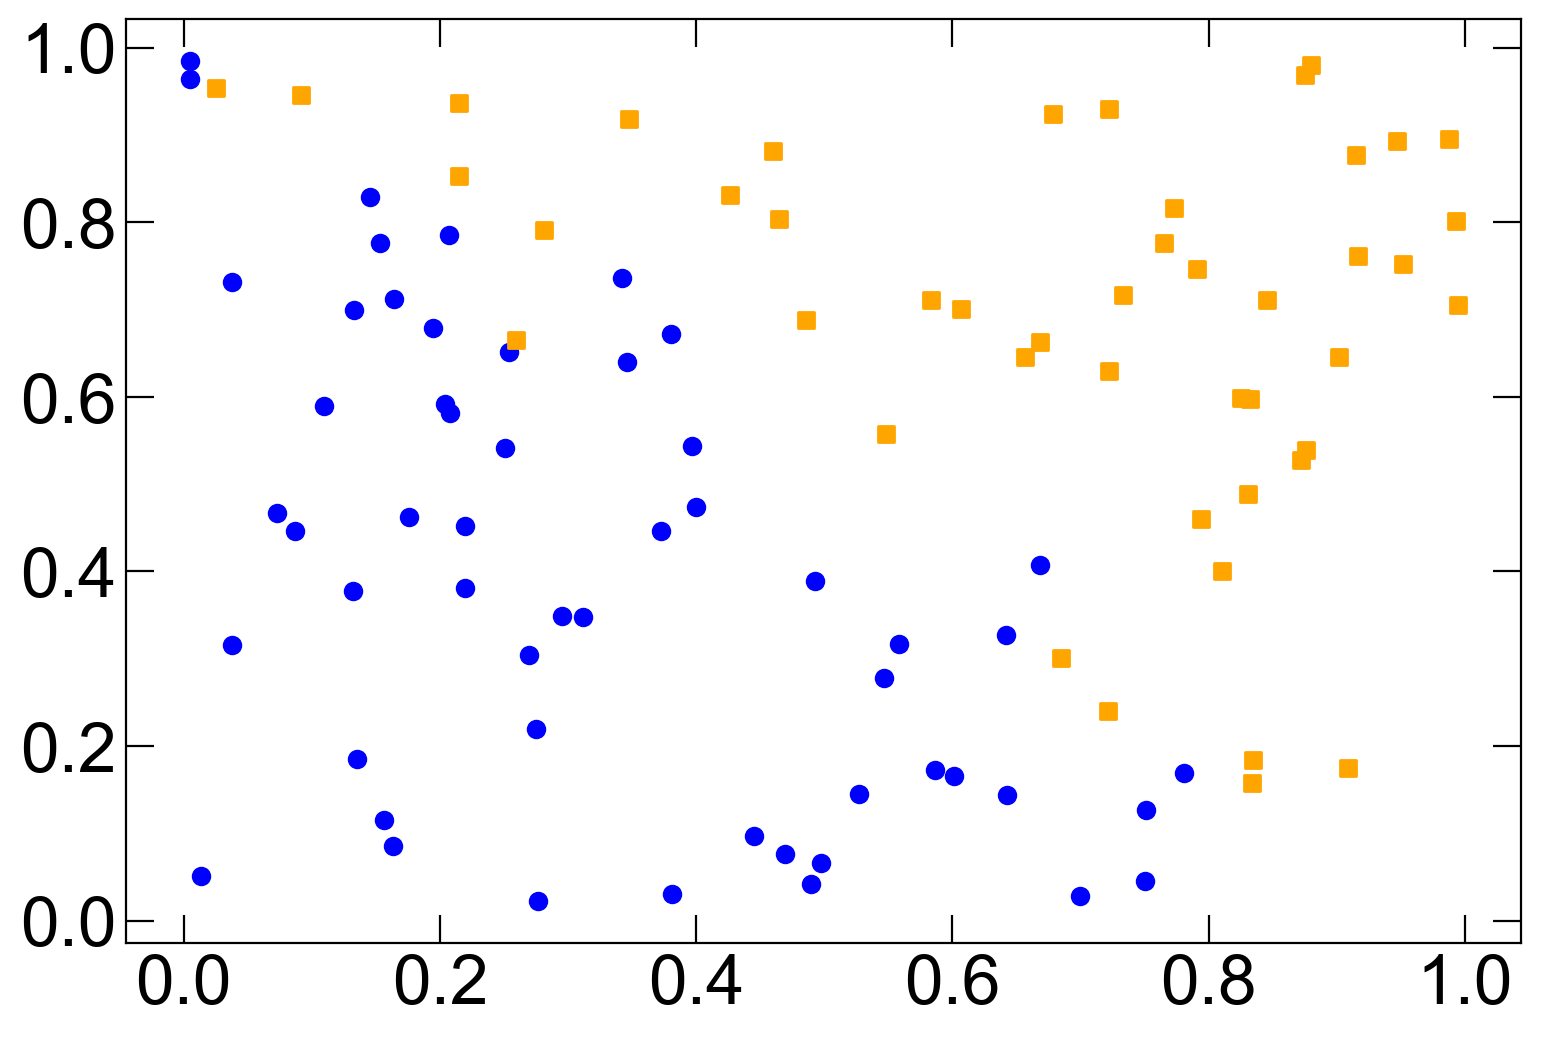

In [253]:
plot(Xa, Ya)

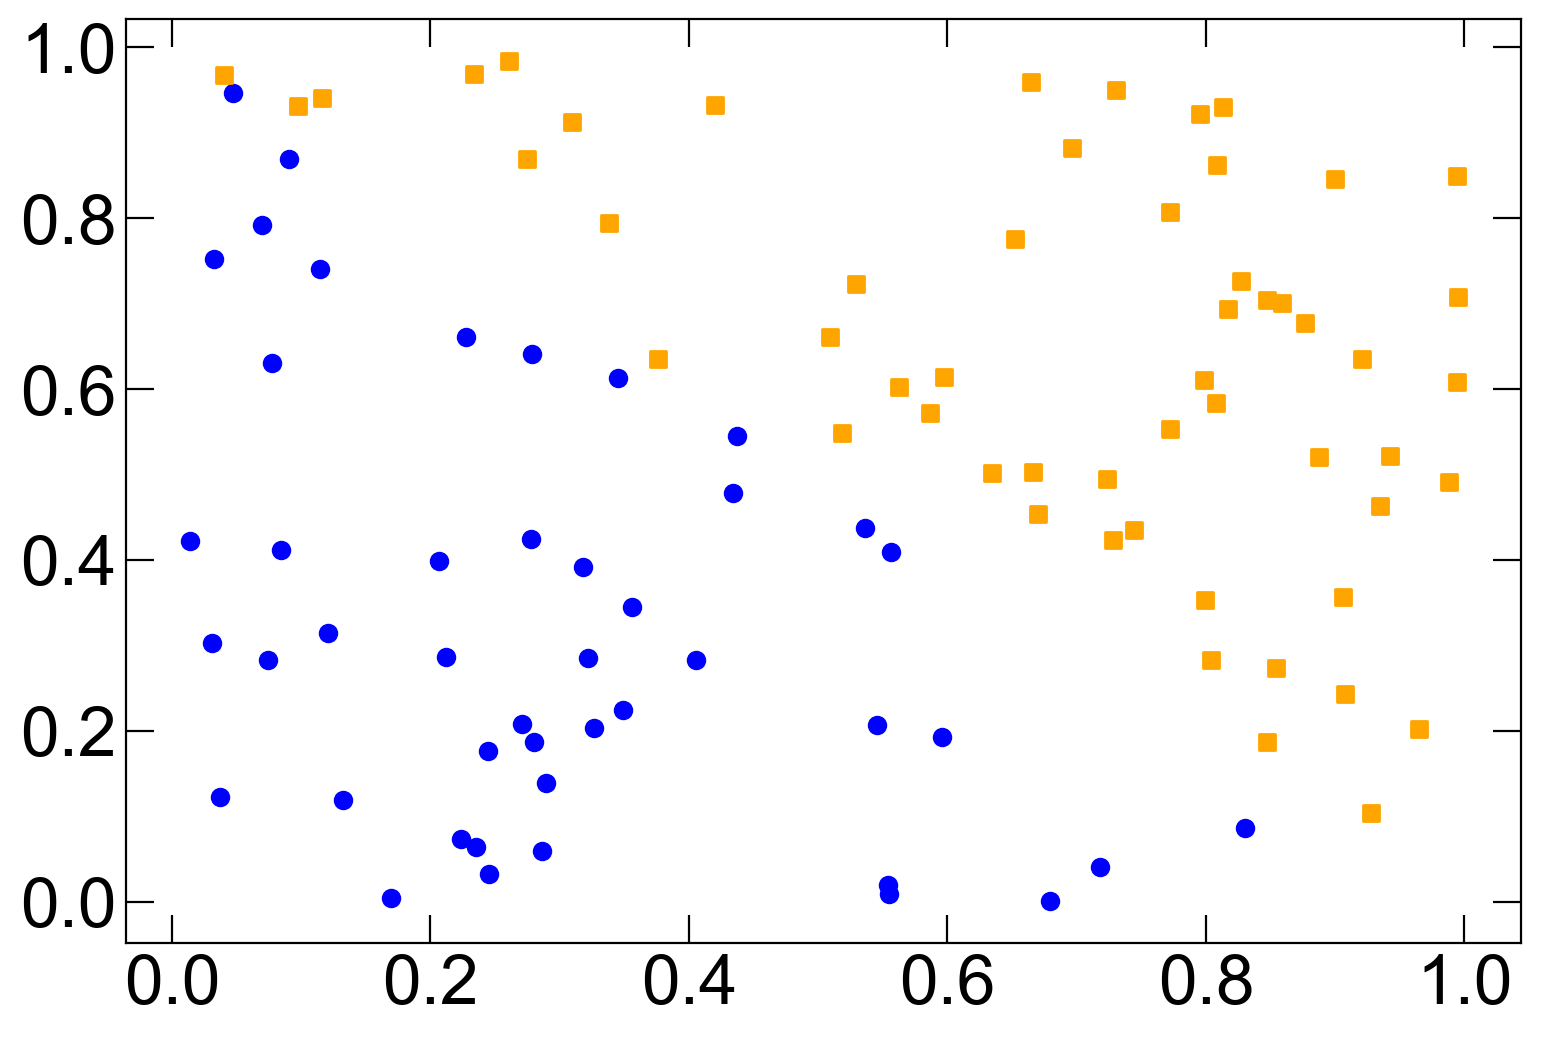

In [258]:
plot(Xb, Yb)

The gradient of the cost function is

$$\nabla_\theta J(\theta) = - \frac{1}{m} \sum_{i = 1}^{m} \frac{y^{(i)} x^{(i)}}{1 + \exp (y^{(i)} \theta^T x^{(i)})}$$

which means that the gradient descent algorithm is trying to minimize

$$\ell (\theta) = - \frac{1}{m} \sum_{i = 1}^{m} \log \frac{1}{1 + \exp (-y^{(i)} \theta^T x^{(i)})}$$

If a dataset is completely linearly separable, i.e. $\forall i \in \{1, \dots, m \}, \ y^{(i)} \theta^T x^{(i)} > 0$,
then, by multiplying a larger positive scalar, there will always be a new $\theta$ that makes $\ell (\theta)$ even smaller,
which prevents the algorithm from converging. However, if the dataset is not linearly separable, $\theta$ cannot be generated
in such way while minimizing $\ell (\theta)$.

## Problem 5

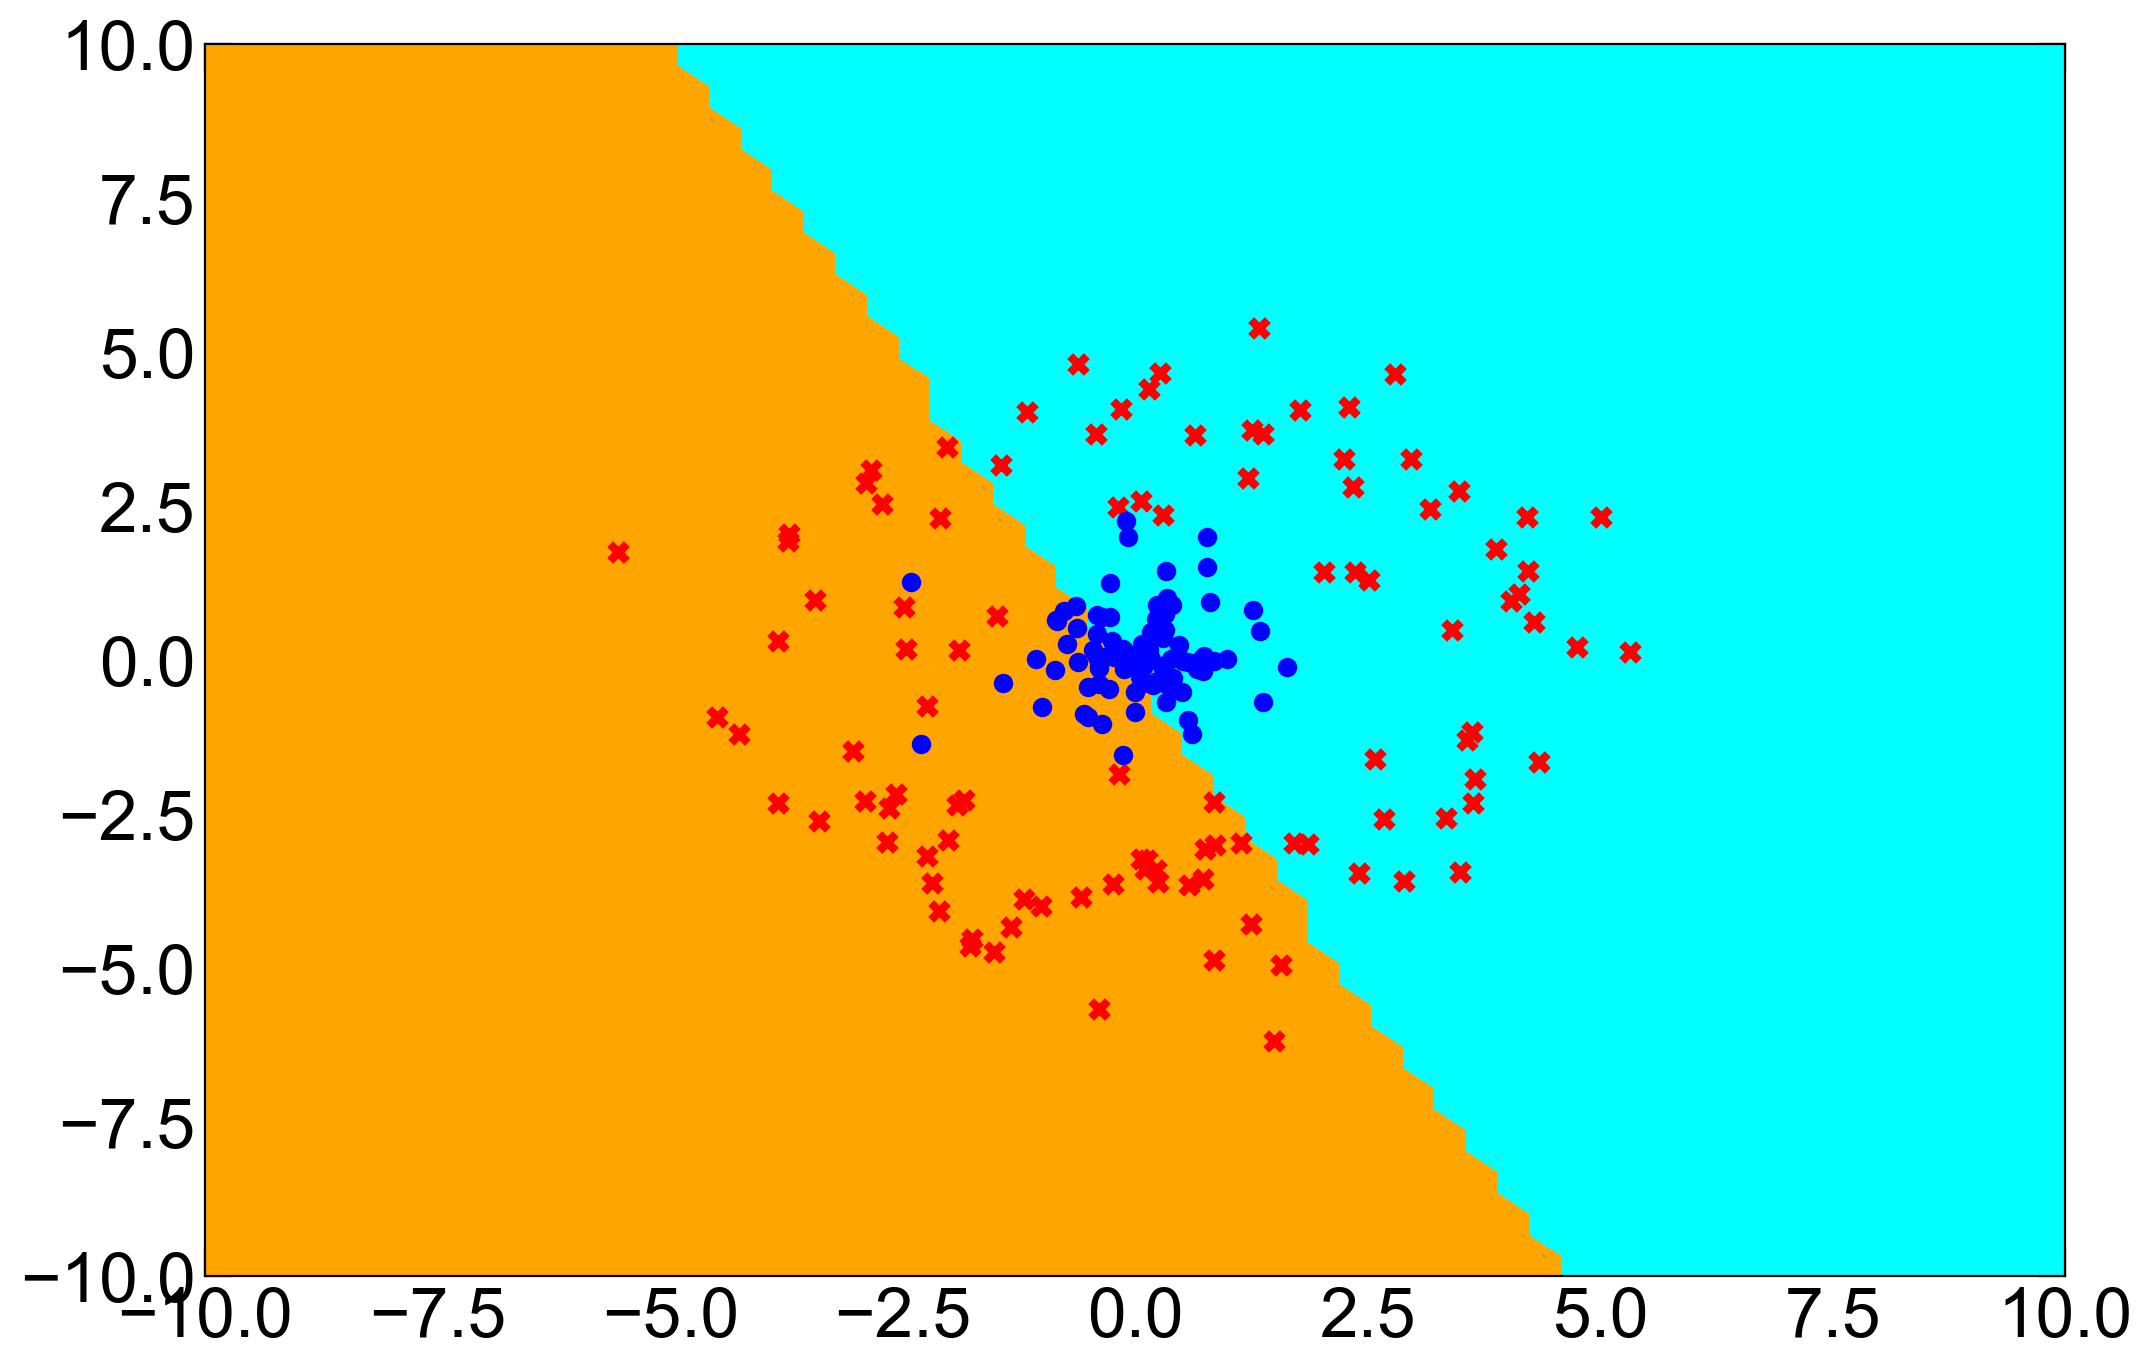

In [256]:
train_x, train_y = util.load_csv('data/ds5_train.csv')

m, n = train_x.shape

state = p05_percept.initial_state(n)

kernel = p05_percept.dot_kernel
kernel_name = 'Dot_kernel'

learning_rate = 0.01

for x_i, y_i in zip(train_x, train_y):
    p05_percept.update_state(state, kernel, learning_rate, x_i, y_i)

test_x, test_y = util.load_csv('data/ds5_test.csv')

plt.figure(figsize=(12, 8))
util.plot_contour(lambda a: p05_percept.predict(state, kernel, a))
util.plot_points(test_x, test_y)
plt.savefig('output/p05_{}_output.pdf'.format(kernel_name))

predict_y = [p05_percept.predict(state, kernel, test_x[i, :]) for i in range(test_y.shape[0])]

np.savetxt('output/p05_{}_predictions'.format(kernel_name), predict_y)

### Kernalising the perceptron

Recall the update rule

$$\theta^{(i + 1)} := \theta^{(i)} + \alpha \big( y^{(i + 1)} - h_{\theta^{(i)}} (\phi (x^{(i + 1)})) \big) \phi (x^{(i + 1)})$$

We can easily figure out that $\theta^{(i)}$ is a linear combination of $\phi (x^{(1)}), \dots , \phi (x^{(i)})$, that is

\begin{align*}
\theta^{(i)} & = \sum_{j = 1}^{i} \beta_j \phi (x^{(j)}) \\
\theta^{(0)} & = \vec{0}
\end{align*}

To make the prediction for x^{(i + 1)}, Kernel definition is enough (explicit representation of the transformation $\phi(x)$ is not needed):
\begin{align*}
h_{\theta^{(i)}} (\phi (x^{(i + 1)})) & = \mathrm{sign} ((\theta^{(i)})^T \phi (x^{(i + 1)})) = \\
                                      & = \mathrm{sign} \big( \sum_{j = 1}^{i} \beta_j \phi (x^{(j)})^T \phi (x^{(i + 1)}) \big) = \\
                                      & = \mathrm{sign} \big( \sum_{j = 1}^{i} \beta_j \langle \phi (x^{(j)}) , \phi (x^{(i + 1)}) \rangle \big) = \\
                                      & = \mathrm{sign} \big( \sum_{j = 1}^{i} \beta_j K(x^{(j)}, x^{(i + 1)}) \big).
\end{align*}

From very first and the last expressions one can find the explicit expresstion for $\beta_{i+1}$:
$$\beta_{i + 1} := \alpha ( y^{(i + 1)} - \mathrm{sign} \big( \sum_{j = 1}^{i} \beta_j K(x^{(j)}, x^{(i + 1)}) \big) )$$

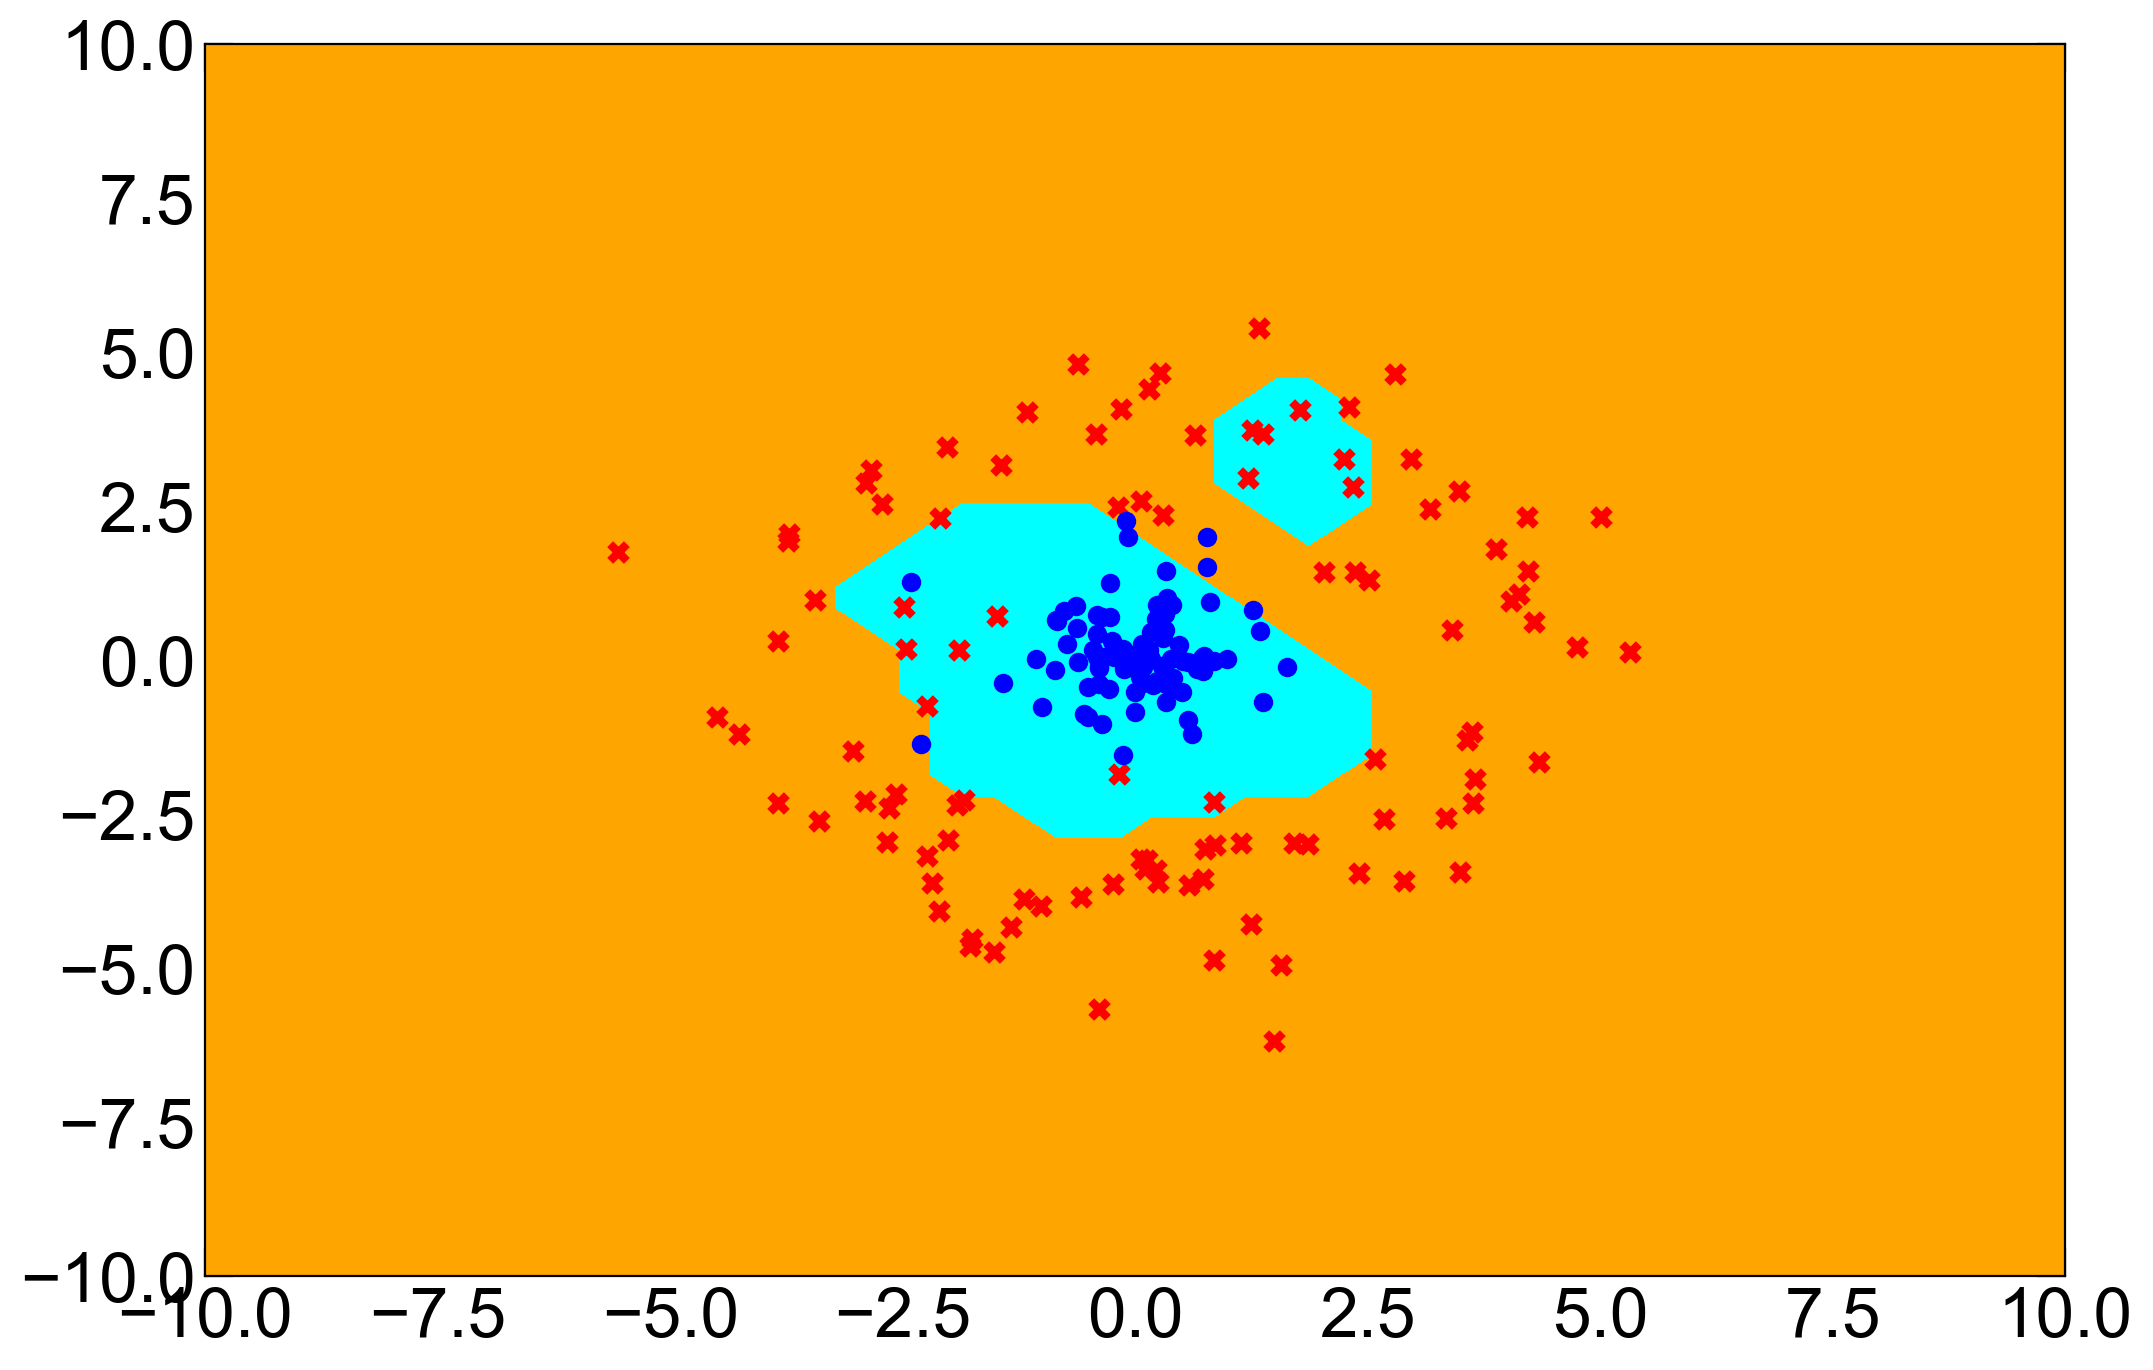

In [257]:
train_x, train_y = util.load_csv('data/ds5_train.csv')

m, n = train_x.shape

state = p05_percept.initial_state(n)

kernel = p05_percept.rbf_kernel
kernel_name = 'Rbf_kernel'

learning_rate = 0.01

for x_i, y_i in zip(train_x, train_y):
    p05_percept.update_state(state, kernel, learning_rate, x_i, y_i)

test_x, test_y = util.load_csv('data/ds5_test.csv')

plt.figure(figsize=(12, 8))
util.plot_contour(lambda a: p05_percept.predict(state, kernel, a))
util.plot_points(test_x, test_y)
plt.savefig('output/p05_{}_output.pdf'.format(kernel_name))

predict_y = [p05_percept.predict(state, kernel, test_x[i, :]) for i in range(test_y.shape[0])]

np.savetxt('output/p05_{}_predictions'.format(kernel_name), predict_y)

## Problem 6

\begin{align*}
\ell (\phi_y, \phi_{k \vert y = 1}, \phi_{k \vert y = 0})
    & = \sum_{i = 1}^{m} \log p(x^{(i)}, y^{(i)}; \ \phi_y, \phi_{k \vert y = 1}, \phi_{k \vert y = 0}) \\
    & = \sum_{i = 1}^{m} \log p(x^{(i)} \ \vert \ y^{(i)}; \ \phi_{k \vert y = 1}, \phi_{k \vert y = 0}) \ p(y^{(i)}; \ \phi_y) \\
\end{align*}

where $x^{(i)} \ \vert \ y^{(i) = 1}; \phi_{k \vert y = 1} \sim \mathrm{Mult}(n, \phi_{k \vert y = 1})$, $\phi_{k \vert y = 1}$ is the
probability that word $k$ appears given $y = 1$. Similar for $\phi_{k \vert y = 0}$.

Therefore, to maximize $\ell$ w.r.t $\phi_{k \vert y = 1}$ is equivalent to maximizing

$$
\sum_{i = 1}^{m} 1 \{ y^{(i)} = 1 \} \sum_{k = 1}^{n} x_k^{(i)} \log \phi_{k \vert y = 1}
$$

subject to the constraints $\phi_{k \vert y = 1} \geq 0$ and $\sum_{k = 1}^{n} \phi_{k \vert y = 1} = 1$, where $x_k^{(i)}$ is the
number of times that word $k$ appears in the $i$-th message.

By introducing a Lagrange multiplier $\lambda \in \mathbb{R}$ corresponding to the second constraint, we have

$$
\mathcal{L}(\lambda, \phi_{k \vert y = 1}) = \sum_{i = 1}^{m} 1 \{ y^{(i)} = 1 \} \sum_{i = 1}^{n} x_k^{(i)} \log \phi_{k \vert y = 1} - \lambda \big( \sum_{k = 1}^{n} \phi_{k \vert y = 1} - 1 \big)
$$

By solving the Lagrange multiplier problem and applying Laplace smoothing,

$$
\phi_{k \vert y = 1} := \frac{1 + \sum_{i = 1}^{m} 1 \{ y^{(i)} = 1 \} x_k^{(i)}}{n + \sum_{i = 1}^{m} 1 \{ y^{(i)} = 1 \} \sum_{j = 1}^{n} x_j^{(i)}}
$$.

Similarly,

$$
\phi_{k \vert y = 0} := \frac{1 + \sum_{i = 1}^{m} 1 \{ y^{(i)} = 0 \} x_k^{(i)}}{n + \sum_{i = 1}^{m} 1 \{ y^{(i)} = 0 \} \sum_{j = 1}^{n} x_j^{(i)}}
$$

and $$\phi_y = (1 / m) \sum_{i = 1}^{m} 1 \{ y^{(i)} = 1 \}$$.

To make a prediction, instead of computing the probabilities explicitly, we compare the logarithm of $p(y = 1 \ \vert \ x) / p(y = 0 \ \vert \ x)$ with 0.

\begin{align*}
\log \frac{p(y = 1 \ \vert \ x)}{p(y = 0 \ \vert \ x)}
    & = \log \frac{p(x \ \vert \ y = 1) \ p(y = 1)}{p(x \ \vert \ y = 0) \ p(y = 0)} \\
    & = \log \frac{\big( \prod_{k = 1}^{n} p(x_k \ \vert \ y = 1) \big) p(y = 1)}{\big( \prod_{k = 1}^{n} p(x_k \ \vert \ y = 0) \big) p(y = 0)} \\
    & = \sum_{k = 1}^{n} x_k (\log \phi_{k \vert y = 1} - \log \phi_{k \vert y = 0}) + \log \frac{\phi_y}{1 - \phi_y}
\end{align*}

In [217]:
train_messages, train_labels = util.load_spam_dataset('data/ds6_train.tsv')
val_messages, val_labels = util.load_spam_dataset('data/ds6_val.tsv')
test_messages, test_labels = util.load_spam_dataset('data/ds6_test.tsv')
dictionary = p06_spam.create_dictionary(train_messages)
util.write_json('output/p06_dictionary', dictionary)


### Transform text

In [230]:
train_matrix = p06_spam.transform_text(train_messages, dictionary)
val_matrix = p06_spam.transform_text(val_messages, dictionary)
test_matrix = p06_spam.transform_text(test_messages, dictionary)

### Train model

In [231]:
naive_bayes_model = p06_spam.fit_naive_bayes_model(train_matrix, train_labels)

### Test model

In [233]:
naive_bayes_predictions = p06_spam.predict_from_naive_bayes_model(naive_bayes_model, test_matrix)
naive_bayes_accuracy = np.mean(naive_bayes_predictions == test_labels)

print('Naive Bayes had an accuracy of {} on the testing set'.format(naive_bayes_accuracy))

Naive Bayes had an accuracy of 0.978494623655914 on the testing set


In [234]:
messages_FP = [msg for msg, true, pred in zip(test_messages, test_labels, naive_bayes_predictions) if pred == 1 and true == 0]
messages_FN = [msg for msg, true, pred in zip(test_messages, test_labels, naive_bayes_predictions) if pred == 0 and true == 1]

print('True SPAM but misidentified')
print(*messages_FN, sep='\n\n')
print()
print('Not true SPAM but misidentified')
print(*messages_FP, sep='\n\n')

True SPAM but misidentified
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Calls£1/minmoremobsEMSPOBox45PO139WA

Sorry I missed your call let's talk when you have the time. I'm on 07090201529

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

A link to your picture has been sent. You can also use http://alto18.co.uk/wave/wave.asp?o=44345

Missed call alert. These numbers called but left no message. 07008009200

Goal! Arsenal 4 (Henry, 7 v Liverpool 2 Henry scores with a simple shot from 6 yards from a pass by Bergkamp to give Arsenal a 2 goal margin after 78 mins.

FROM 88066 LOST £12 HELP

Not true SPAM but misidentified
Madam,regret disturbance.might receive a reference check from DLF Premarica.kindly be informed.Rgds,Rakhesh,Kerala.

Have you laid your airtel line to rest?

Fighting with the world is easy, u either win or l

### Top 5 SPAM words

In [235]:
top_5_words, llr = p06_spam.get_top_five_naive_bayes_words(naive_bayes_model, dictionary)

print('The top 5 indicative words for Naive Bayes are: ', top_5_words)

The top 5 indicative words for Naive Bayes are:  ['claim', 'won', 'prize', 'tone', 'urgent!', 'awarded', 'entry', '£1000', 'guaranteed', '4*', '150ppm', '£100', '18', 'ringtone', 'weekly']


### SVM

In [247]:
optimal_radius = p06_spam.compute_best_svm_radius(train_matrix, train_labels, val_matrix, val_labels, [0.01, 0.1, 1, 10])

print('The optimal SVM radius was {}'.format(optimal_radius))

svm_predictions = svm.train_and_predict_svm(train_matrix, train_labels, test_matrix, optimal_radius)

svm_accuracy = np.mean(svm_predictions == test_labels)

print('The SVM model had an accuracy of {} on the testing set'.format(svm_accuracy, optimal_radius))

The optimal SVM radius was 0.1
The SVM model had an accuracy of 0.9695340501792115 on the testing set
